## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

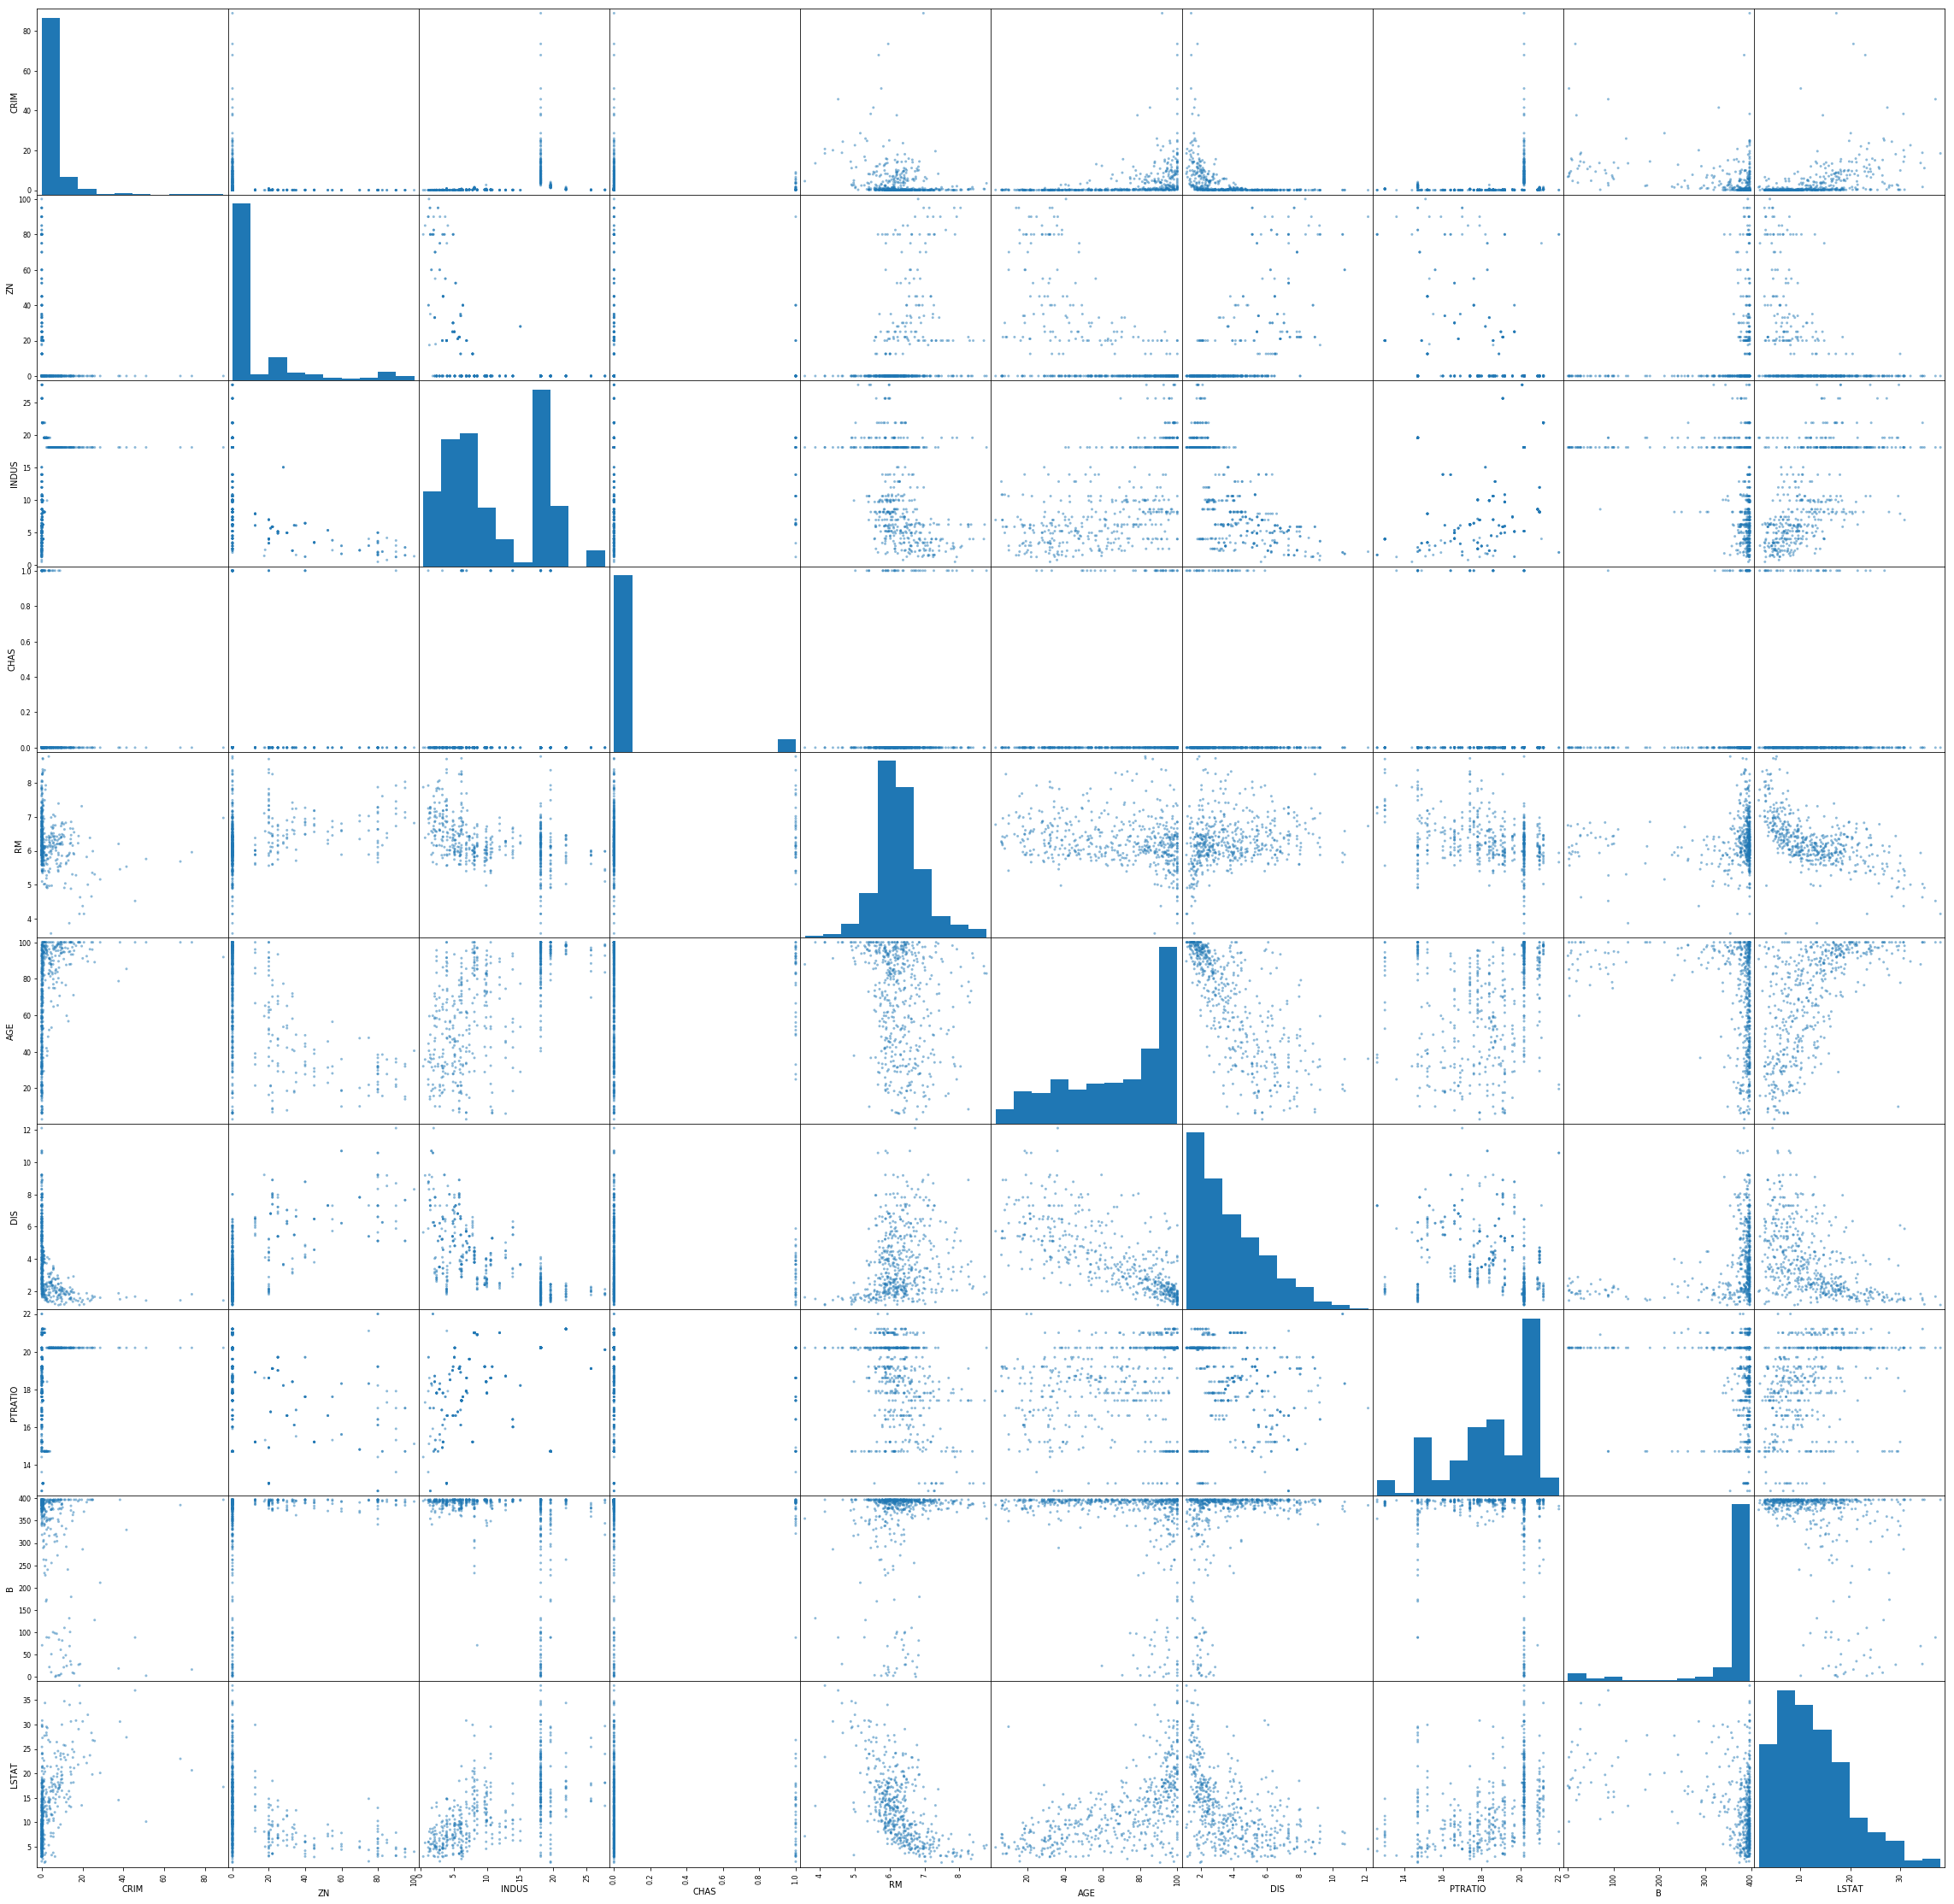

In [4]:
boston_features_check = boston_features.iloc[:, 0:10]

pd.plotting.scatter_matrix(boston_features_check, figsize=(40,40));

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [3]:
boston_features_check.describe()
#There are a large proportion of zeros in the ZN feature.

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,6.284634,68.574901,3.795043,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.702617,28.148861,2.105710,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.129600,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,5.885500,45.025000,2.100175,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,6.208500,77.500000,3.207450,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,6.623500,94.075000,5.188425,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,22.000000,396.900000,37.970000


In [10]:
boston_features_check.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [4]:
log_list = ['CRIM', 'DIS', 'LSTAT']
boston_features_check1 = boston_features_check.copy()
for i in log_list:
    boston_features_check1[i] = boston_features_check1[i].apply(lambda x: np.log(x))
boston_features_check1.describe()



,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-0.780436,11.363636,11.136779,0.069170,6.284634,68.574901,1.188032,18.455534,356.674032,2.370965
std,2.162050,23.322453,6.860353,0.253994,0.702617,28.148861,0.539547,2.164946,91.294864,0.600891
min,-5.064036,0.000000,0.460000,0.000000,3.561000,2.900000,0.121864,12.600000,0.320000,0.548121
25%,-2.500488,0.000000,5.190000,0.000000,5.885500,45.025000,0.742021,17.400000,375.377500,1.938729
50%,-1.360641,0.000000,9.690000,0.000000,6.208500,77.500000,1.165473,19.050000,391.440000,2.430097
75%,1.302119,12.500000,18.100000,0.000000,6.623500,94.075000,1.646399,20.200000,396.225000,2.830563
max,4.488369,100.000000,27.740000,1.000000,8.780000,100.000000,2.495393,22.000000,396.900000,3.636796


"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [5]:
boston_features_check2 = boston_features_check.copy()
for i in log_list:
    boston_features_check2[i] = boston_features_check2[i].apply(lambda x: np.sqrt(x))
boston_features_check2.describe()


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.229439,11.363636,11.136779,0.069170,6.284634,68.574901,1.878750,18.455534,356.674032,3.417673
std,1.451263,23.322453,6.860353,0.253994,0.702617,28.148861,0.515623,2.164946,91.294864,0.987167
min,0.079498,0.000000,0.460000,0.000000,3.561000,2.900000,1.062826,12.600000,0.320000,1.315295
25%,0.286435,0.000000,5.190000,0.000000,5.885500,45.025000,1.449198,17.400000,375.377500,2.636277
50%,0.506461,0.000000,9.690000,0.000000,6.208500,77.500000,1.790934,19.050000,391.440000,3.370459
75%,1.917572,12.500000,18.100000,0.000000,6.623500,94.075000,2.277794,20.200000,396.225000,4.117645
max,9.432720,100.000000,27.740000,1.000000,8.780000,100.000000,3.482312,22.000000,396.900000,6.161980


In [6]:
boston_features_check3 = boston_features_check.copy()
for i in log_list:
    boston_features_check3[i] = boston_features_check3[i].apply(lambda x: x**2)
boston_features_check3.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,86.897912,11.363636,11.136779,0.069170,6.284634,68.574901,18.827601,18.455534,356.674032,210.993989
std,513.258198,23.322453,6.860353,0.253994,0.702617,28.148861,21.136892,2.164946,91.294864,236.061920
min,0.000040,0.000000,0.460000,0.000000,3.561000,2.900000,1.275996,12.600000,0.320000,2.992900
25%,0.006731,0.000000,5.190000,0.000000,5.885500,45.025000,4.410735,17.400000,375.377500,48.303700
50%,0.065804,0.000000,9.690000,0.000000,6.208500,77.500000,10.287804,19.050000,391.440000,129.050000
75%,13.520940,12.500000,18.100000,0.000000,6.623500,94.075000,26.921407,20.200000,396.225000,287.472100
max,7916.764166,100.000000,27.740000,1.000000,8.780000,100.000000,147.052002,22.000000,396.900000,1441.720900


In [5]:
def recode_ZN(ZN):
    if ZN ==0:
        return 0
    else:
        return 1

In [6]:
final_features = pd.DataFrame()
final_features['ZN'] = boston_features_check['ZN'].apply(lambda x: recode_ZN(x))

In [8]:
log_list = ['CRIM', 'DIS', 'LSTAT', 'INDUS', 'PTRATIO']
for i in log_list:
    final_features[i] = boston_features_check[i].apply(lambda x: np.log(x))
final_features.describe()




,ZN,CRIM,DIS,LSTAT,INDUS,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.264822,-0.780436,1.188032,2.370965,2.160192,2.907914
std,0.441675,2.162050,0.539547,0.600891,0.776987,0.124821
min,0.000000,-5.064036,0.121864,0.548121,-0.776529,2.533697
25%,0.000000,-2.500488,0.742021,1.938729,1.646734,2.856470
50%,0.000000,-1.360641,1.165473,2.430097,2.271094,2.947064
75%,1.000000,1.302119,1.646399,2.830563,2.895912,3.005683
max,1.000000,4.488369,2.495393,3.636796,3.322875,3.091042


In [12]:
var_list = ['AGE', 'B', 'CHAS', 'RM']
for i in var_list:
    final_features[i] = boston_features_check[i].copy()


In [16]:
final_features['CRIM'] = (final_features['CRIM'] - min(final_features['CRIM']))/(max(final_features['CRIM']) - min(final_features['CRIM']))
final_features['B'] = (final_features['B'] - min(final_features['B']))/(max(final_features['B']) - min(final_features['B']))
final_features['RM'] = (final_features['RM'] - min(final_features['RM']))/(max(final_features['RM']) - min(final_features['RM']))

In [18]:
final_features['LSTAT'] = (final_features['LSTAT'] - np.mean(final_features['LSTAT']))/(max(final_features['LSTAT']) - min(final_features['LSTAT']))
final_features['AGE'] = (final_features['AGE'] - np.mean(final_features['AGE']))/(max(final_features['AGE']) - min(final_features['AGE']))

In [19]:
final_features['DIS'] = (final_features['DIS'] - np.mean(final_features['DIS']))/np.std(final_features['B'], ddof=1)
final_features['INDUS'] = (final_features['INDUS'] - min(final_features['INDUS']))/np.std(final_features['INDUS'], ddof=1) 

In [22]:
final_features["PTRATIO"] = (final_features["PTRATIO"])/(np.linalg.norm(final_features["PTRATIO"]))

In [26]:
features_final = final_features
features_final.describe()

,ZN,CRIM,DIS,LSTAT,INDUS,PTRATIO,AGE,B,CHAS,RM
count,506.000000,506.000000,5.060000e+02,5.060000e+02,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000
mean,0.264822,0.448432,7.040043e-15,-6.105952e-16,3.779625,0.044415,-3.491388e-16,0.898568,0.069170,0.521869
std,0.441675,0.226336,2.343761e+00,1.945466e-01,1.000000,0.001906,2.898956e-01,0.230205,0.253994,0.134627
min,0.000000,0.000000,-4.631380e+00,-5.901701e-01,0.000000,0.038699,-6.763636e-01,0.000000,0.000000,0.000000
25%,0.000000,0.268367,-1.937451e+00,-1.399422e-01,3.118793,0.043629,-2.425325e-01,0.945730,0.000000,0.445392
50%,0.000000,0.387692,-9.799715e-02,1.914468e-02,3.922359,0.045013,9.191657e-02,0.986232,0.000000,0.507281
75%,1.000000,0.666445,1.991121e+00,1.488009e-01,4.726513,0.045908,2.626169e-01,0.998298,0.000000,0.586798
max,1.000000,1.000000,5.679105e+00,4.098299e-01,5.276024,0.047212,3.236364e-01,1.000000,1.000000,1.000000


## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.